In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.optimizers import *
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV, ShuffleSplit, learning_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/norma/Desktop/BITIRME/(Mcisiz)GSE_OrtakData_NormR.csv', sep = ";", decimal=",")
print(df.shape)
df = df[df.Class != 2]
df.shape

(1262, 11619)


(949, 11619)

In [12]:
features = df.drop('Class',axis=1)
labels_dr = 'C:/Users/norma/Desktop/BITIRME/gse_less_feature.csv'
labels_df = pd.read_csv(labels_dr, sep = ',')
labels = labels_df.iloc[:949,:2]

In [6]:
pca = PCA(n_components = 225).fit(features)
principalComponents = pca.fit_transform(features)
columns = ['Pc' + str(i) for i in range(1,226)]
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(principalDf, labels, test_size= 0.25, random_state=42)

In [22]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [26]:
# print best parameter after tuning
print(bestF.best_params_)

print('\n')

# print how our model looks after hyper-parameter tuning
print(bestF.best_estimator_)

{'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300}


RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=300)


In [36]:
criterion = ['gini', 'entropy']
max_features = ['sqrt', 'log2', None]

hyperF = dict(criterion=criterion, max_features=max_features)

gridF = GridSearchCV(RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=300), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [37]:
# print best parameter after tuning
print(bestF.best_params_)

print('\n')

# print how our model looks after hyper-parameter tuning
print(bestF.best_estimator_)

{'criterion': 'gini', 'max_features': 'sqrt'}


RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=300)


In [38]:
grid_predictions = bestF.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       119
           1       0.69      0.61      0.65       119

   micro avg       0.67      0.67      0.67       238
   macro avg       0.67      0.67      0.67       238
weighted avg       0.67      0.67      0.67       238
 samples avg       0.67      0.67      0.67       238



In [39]:
class_d = 'C:/Users/norma/Desktop/BITIRME/duzgun_GSE_OrtakData_NormR.csv'
class_df = pd.read_csv(class_d, sep = ';', decimal = ',')
class_df = class_df[class_df.Class != 2]

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(class_df[['Class']]).toarray())
encoder_df.columns = ['AD','CTL']

y_test_encoded = encoder.inverse_transform(y_test).ravel()

# Best Random Forest Model

In [41]:
clf = RandomForestClassifier(max_depth=30, min_samples_leaf=5, min_samples_split=5, criterion = 'gini', max_features = 'sqrt',
                       n_estimators=300)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

y_pred_ = np.argmax(y_pred, axis=1)

Classification report : 
               precision    recall  f1-score   support

           0       0.64      0.77      0.70       119
           1       0.72      0.57      0.64       119

    accuracy                           0.67       238
   macro avg       0.68      0.67      0.67       238
weighted avg       0.68      0.67      0.67       238



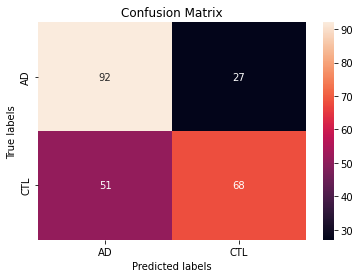

In [51]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test_encoded, y_pred_, labels=[0,1])
print('Classification report : \n',matrix)

labels_ = ['AD','CTL']
ax= plt.subplot()

# confusion matrix
matrix = confusion_matrix(
    y_test_encoded, y_pred_)

sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels_);

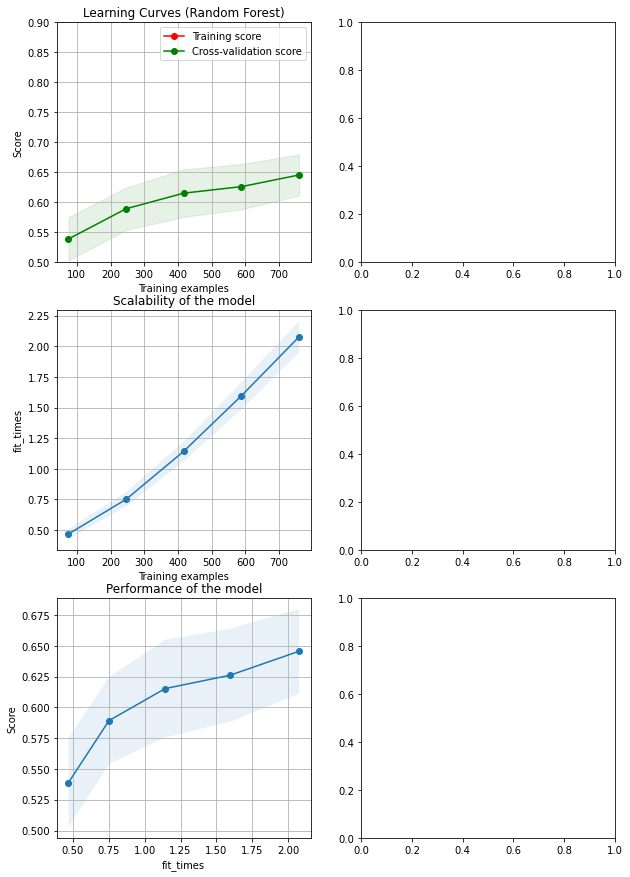

In [48]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Random Forest)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(
estimator, title, principalDf, labels, axes=axes[:, 0], ylim=(0.5, 0.9), cv=cv, n_jobs=4
)

plt.show()